# MNIST Classification using Random_Forest Classifier

In [1]:
# Adding our data to the sklearn dataset location
from sklearn.datasets._base import get_data_home
get_data_home()

'C:\\Users\\dinesh\\scikit_learn_data'

## Unfortunately fetch_mldata() has been replaced in the latest version of sklearn as fetch_openml()

In [2]:
# use this code for older version sklearn(v 0.19)

# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata("MNIST original")

In [3]:
# for latest version (v 0.24 or unstable)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [4]:
print(x)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [5]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [6]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
pixels = pd.DataFrame(x)
labels = pd.DataFrame(y)

In [8]:
pixels.loc[0].values #value of zero th element

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
labels.loc[0].values #element in position 0th

['5']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

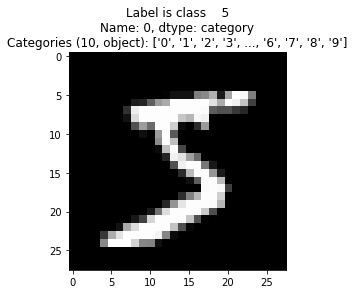

In [10]:
#visualisation
pixel = pixels.loc[0]
label = labels.loc[0]

pixel = np.array(pixel,dtype = 'uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap = 'gray')
plt.show()

In [11]:
#splitting our dataset to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7.0) 

In [12]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (60000, 784)
x_test (10000, 784)
y_train (60000,)
y_test (10000,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
y_pred = model.predict(x_test)

In [15]:
#Accuracy
model.score(x_test, y_test)

0.9734

## Another way of getting Accuracy

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9734

In [17]:
y_test.iloc[0]

'4'

In [18]:
#predicting
y_predicted = model.predict(x_test.iloc[0].values.reshape(1,-1))
print(y_predicted)

['4']


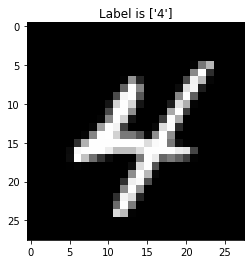

In [19]:
pixel = x_test.iloc[0].values
label = y_predicted


pixel = np.array(pixel,dtype = 'uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap = 'gray')
plt.show()